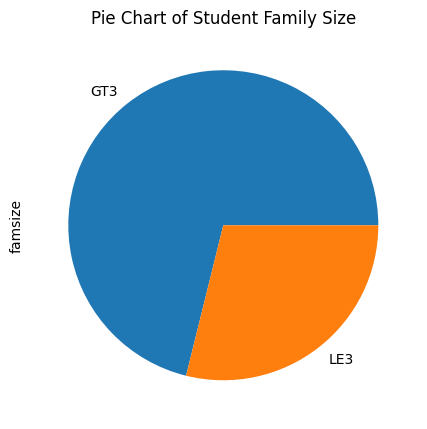

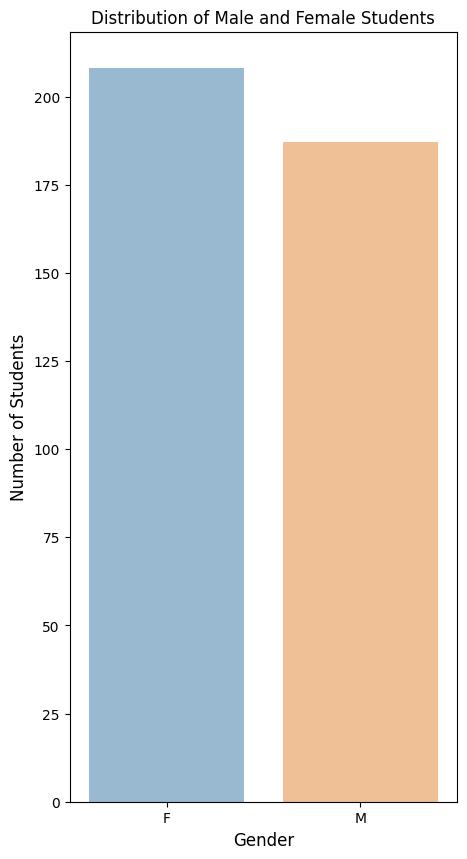

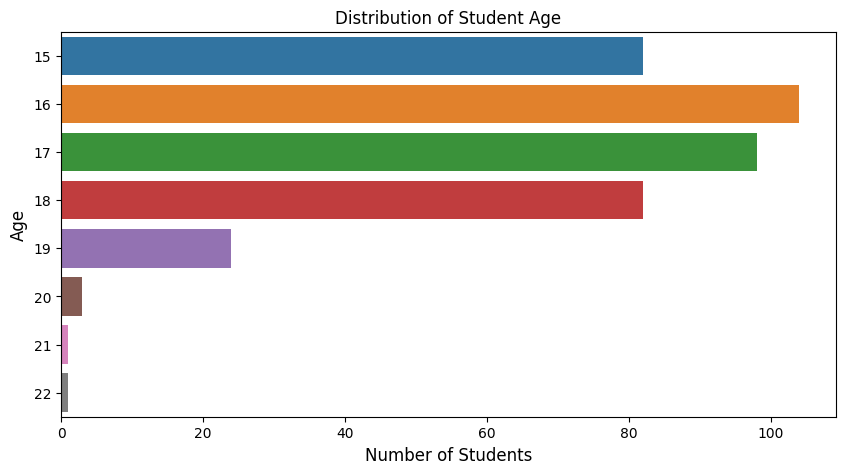

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


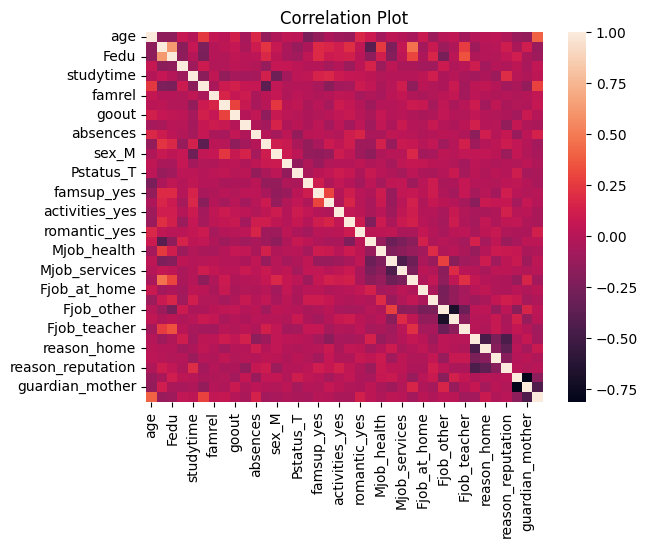

Coefficients [-2.31806104e-01  1.48440211e-01 -5.74409983e-02 -4.20400777e-01
  6.78577174e-01 -1.81498697e+00  7.15731030e-02  2.83190712e-01
 -5.86892312e-01 -1.47273418e-01  2.45419402e-02  1.09530841e+00
  4.95780386e-01 -5.95169214e-01 -1.51760735e+00 -9.44396270e-01
  3.15979089e-01 -2.69337152e-01  1.00049128e+00 -6.66442905e-01
 -8.32219518e+11 -8.32219518e+11 -8.32219518e+11 -8.32219518e+11
 -8.32219518e+11 -2.76290699e+11 -2.76290699e+11 -2.76290699e+11
 -2.76290699e+11 -2.76290699e+11  3.54920694e+11  3.54920694e+11
  3.54920694e+11  3.54920694e+11 -5.18449401e+12 -5.18449401e+12
 -5.18449401e+12]
Intercept: 5938083534104.254
R2: 0.13956477137937429
MSE: 9.989201415709308
RMSE: 3.1605697928869265
MAE: 2.491342240021009


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

student_data = pd.read_csv(
    'https://raw.githubusercontent.com/rickyli8529/Student-Performance-Prediction/main/student_data.csv')

famsize_data = student_data.famsize.value_counts()
plt.figure(figsize=(5, 10))
famsize_data.plot.pie(title='Pie Chart of Student Family Size')
plt.show()

sex_count = student_data.sex.value_counts()
plt.figure(figsize = (5, 10))
sns.barplot(x = sex_count.index, y = sex_count.values, alpha = 0.5)
plt.title('Distribution of Male and Female Students')
plt.ylabel('Number of Students', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.show()

age_count = student_data.age.value_counts()
plt.figure(figsize = (10, 5))
sns.barplot(x = age_count.values, y = age_count.index, alpha = 1, orient = 'h')
plt.title('Distribution of Student Age')
plt.ylabel('Age', fontsize = 12)
plt.xlabel('Number of Students', fontsize = 12)
plt.show()

student_data['mean_grade'] = student_data[['G1', 'G2', 'G3']].mean(axis=1)

remove_columns = ['school', 'address', 'nursery', 'higher', 'Dalc', 'Walc', 'G1', 'G2', 'G3']
for column in remove_columns:
  student_data = student_data.drop(column, axis=1)

categorical_columns_2 = ['sex', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities',
                          'internet', 'romantic']
categorical_columns_3 = ['Mjob', 'Fjob', 'reason', 'guardian']

for column in categorical_columns_2:
    encoding_columns = pd.get_dummies(student_data[column], prefix=column, drop_first=True)
    student_data = student_data.drop(column, axis=1)
    student_data = student_data.join(encoding_columns)

encoder = OneHotEncoder(sparse=False)
student_categorical3 = student_data[categorical_columns_3]

student_encoded = encoder.fit_transform(student_categorical3)

columns = encoder.get_feature_names_out(categorical_columns_3)
student_data_encoded_df = pd.DataFrame(student_encoded, columns=columns)

student_data = student_data.drop(categorical_columns_3, axis=1)
student_data = pd.concat([student_data, student_data_encoded_df], axis=1)

sns.heatmap(student_data.corr())
plt.title('Correlation Plot')
plt.show()

X = student_data.drop(['mean_grade'], axis =1)
y = student_data['mean_grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 2)

LR = LinearRegression()

LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

coefficients = LR.coef_
print(f'Coefficients {coefficients}')

intercept = LR.intercept_
print(f'Intercept: {intercept}')

r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

with open('student_performance.pkl', 'wb') as f:
    pickle.dump(LR, f)

In [25]:
student_data

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,18,4,4,2,2,0,4,3,4,3,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,17,1,1,1,2,0,5,3,3,3,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,15,1,1,1,2,3,4,3,2,3,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,15,4,2,1,3,0,3,2,2,5,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,16,3,3,1,2,0,4,3,2,5,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
391,17,3,1,2,1,0,2,4,5,2,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
392,21,1,1,1,1,3,5,5,3,3,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
393,18,3,2,3,1,0,4,4,1,5,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
file_name = input('Enter a file name for the dataframe: ') + '.csv'
student_data.to_csv(file_name, index=False)

Enter a file name for the dataframe: test1
